### Import

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F 
from torch.utils.data import DataLoader 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms

### Create Fully Connected Network

In [2]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes): 
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x 
    

In [3]:
class CNN(nn.Module):
    def __init__(self, in_channel=3, num_classes=10): # in_channel = 1 if picture is gray, in_channel = 3 if picture is RGB
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), stride=(1,1), padding=(1,1)) # out_channels = 2,4,8,16,32,...
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(16*7*7, num_classes) # We have 28 x 28, but we divided 2 times, so it is 28/2 = 14 -> 14/2 = 7
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        
        return x

In [4]:
model = CNN()
x = torch.randn(64, 1, 28, 28)
print(model(x).shape)

torch.Size([64, 10])


In [5]:
# model = NN(784, 10)

In [6]:
# x = torch.randn(64, 784)

In [7]:
# model(x).shape

### Set Device

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Hyperparameters

In [9]:
in_channel = 1
# input_size = 784
num_classes = 10 
learning_rate = 0.001 
batch_size = 64 
num_epochs = 5

### Load Data

In [10]:
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

### Initialize Network

In [11]:
# model = NN(input_size=input_size, num_classes=num_classes).to(device)

In [12]:
model = CNN().to(device)

### Loss and optimizer

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Train

In [14]:
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Get to correct shape
        # data = data.reshape(data.shape[0],-1)
        
        # forward
        scores = model(data)
        loss = criterion(scores, targets)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        
        # gradient decent or adam step
        optimizer.step() # update weight
        

In [15]:
data.shape

torch.Size([32, 1, 28, 28])

### Evaluation

In [16]:
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")  
          
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            # x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
        
    model.train()

In [17]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 59191 / 60000 with accuracy 98.65
Checking accuracy on test data
Got 9844 / 10000 with accuracy 98.44


Prediction : 5


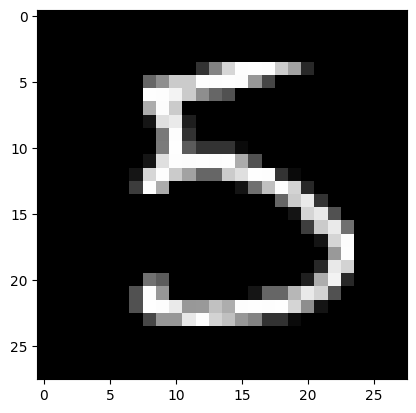

In [23]:
import matplotlib.pyplot as plt 

model.eval()

data, target = test_dataset[15]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction : {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
a